In [110]:
"""
R001_Fall_2023_AI_Reproducibility__
|
R001_Citation_Context_Labelling_Shared.ipynb
Created on Thu Oct 19 23:00:17 2023
@author: Rochana Obadage
"""

'\nR001_Fall_2023_AI_Reproducibility__\n|\nR001_Citation_Context_Labelling.ipynb\nCreated on Thu Oct 19 23:00:17 2023\n@author: Rochana Obadage\n'

In [1]:
!python --version

Python 3.9.13


## ``Label Citation Contexts regarding the reproducibility of Cited Paper`` 

### `dependencies`
> <font face="consolas" color='#000080'><b>1. python:</b><br> 
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;3.8.17&emsp;&emsp;|&emsp;&emsp;3.9.13<br><br>
<b>2. Jupyter Notebook:</b><br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;notebook server: 6.5.4<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Kernel Information: Python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]<br><br>
<b>3. Required Libraries:</b><br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;os (in-built)<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;json (in-built)<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;glob (in-built)<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;matplotlib<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge matplotlib  <b> OR </b> pip install matplotlib<br>    
    

</font>


### `For Instructions`
> see the document : https://github.com/lamps-lab/ai-reproducibility 



In [64]:
import os
import json
import glob

import matplotlib.pyplot as plt

## ``citing papers context labelling``

### Available file names for labelling

In [65]:
already_labelled_list = [i.replace("Citing_Paper_contexts_lables\\","") for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_list

['RS_140_ICDAR_2018_07.json',
 'RS_148_ICDAR_2018_15.json',
 'RS_149_ICDAR_2018_16.json']

In [66]:
available_files_for_labelling = [i.replace("Citing_Paper_contexts\\","") for i in glob.glob("Citing_Paper_contexts/*.json") if i.replace("Citing_Paper_contexts\\","") not in already_labelled_list]

available_files_for_labelling

['RS_001_MLRC_2022_01.json',
 'RS_002_MLRC_2022_02.json',
 'RS_003_MLRC_2022_03.json',
 'RS_004_MLRC_2022_04.json',
 'RS_005_MLRC_2022_05.json',
 'RS_006_MLRC_2022_06.json',
 'RS_007_MLRC_2022_07.json',
 'RS_008_MLRC_2022_08.json',
 'RS_009_MLRC_2022_09.json',
 'RS_010_MLRC_2022_10.json',
 'RS_011_MLRC_2022_11.json',
 'RS_012_MLRC_2022_12.json',
 'RS_013_MLRC_2022_13.json',
 'RS_014_MLRC_2022_14.json',
 'RS_015_MLRC_2022_15.json',
 'RS_016_MLRC_2022_16.json',
 'RS_017_MLRC_2022_17.json',
 'RS_018_MLRC_2022_18.json',
 'RS_019_MLRC_2022_19.json',
 'RS_020_MLRC_2022_20.json',
 'RS_021_MLRC_2022_21.json',
 'RS_022_MLRC_2022_22.json',
 'RS_023_MLRC_2022_23.json',
 'RS_024_MLRC_2022_24.json',
 'RS_025_MLRC_2022_25.json',
 'RS_026_MLRC_2022_26.json',
 'RS_027_MLRC_2022_27.json',
 'RS_028_MLRC_2022_28.json',
 'RS_029_MLRC_2022_29.json',
 'RS_030_MLRC_2022_30.json',
 'RS_031_MLRC_2022_31.json',
 'RS_032_MLRC_2022_32.json',
 'RS_033_MLRC_2022_33.json',
 'RS_034_MLRC_2022_34.json',
 'RS_035_MLRC_

In [67]:
def label_menu():
    image = plt.imread('documents/citing_papers_context_labelling_5.png')
#     image = plt.imread('documents/citing_papers_context_labelling_df.png')
    plt.figure(figsize=(18,6))
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    
    
def assign_a_label(score):
    label = "wrong_label"
    
    if score == 1:
        label = "Strong"
    elif score == 0.5:
        label = "Weak"
    elif score == 0:
        label = "Neutral"
    elif score == -1:
        label = "P-NR"
    elif score == -2:
        label = "O-NR"
    
    return label


# for original paper details
def get_original_paper_details(file_name):
    print("Printing Original Paper (Cited Paper) details")
    print("|")
    org_full_filename = 'Citing_Paper_details/'+file_name
    
    with open(org_full_filename,'r') as f1:
        data_org = json.load(f1)
        print("paper title: ",data_org['title'])
        print("paper authors : ",end="")
        [print(item['name'],end="  ---  ") for item in data_org['authors']]
#         print("\n\n")

In [77]:
def get_label_score(key_,key):
    label_score = 0
    while True:
        label_score = input("Enter the label for item: {} --- context: {} above:".format(key_+1,key+1)).strip()
        
        if label_score not in ['-2','-1','0','0.5','1']:
            print("Wrong Entry-- TRY AGAIN")
            continue
        else:
            break
        
    return float(label_score)

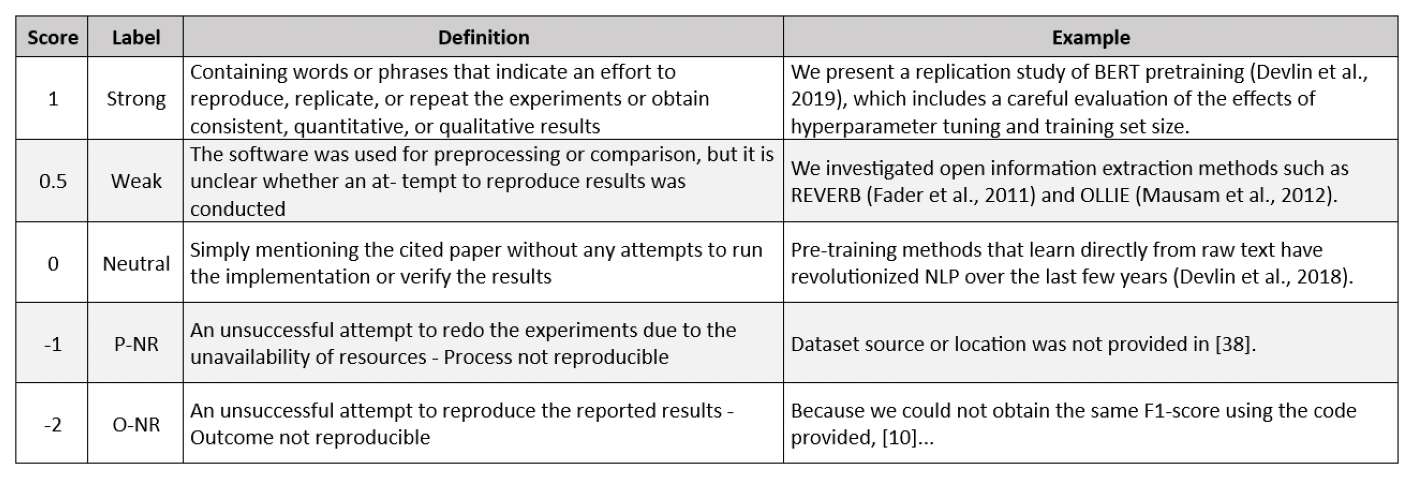

In [69]:
label_menu()

### Start Labelling

In [75]:
already_labelled_list = glob.glob("Citing_Paper_contexts_lables/*.json")
already_labelled_list = [i.replace("Citing_Paper_contexts_lables\\","") for i in already_labelled_list]

FOLDER_NAME = 'Citing_Paper_contexts_lables/'

if not os.path.exists(FOLDER_NAME):
    os.makedirs(FOLDER_NAME)

    
def start_labelling():
    filename = input("input the file name: ").strip() # ex: RS_148_ICDAR_2018_15.json
    full_filename = 'Citing_Paper_contexts/'+filename
    full_filename_new = FOLDER_NAME+filename
    temp_label_file = FOLDER_NAME+'temp_labelling.json' #f"TEMP_{filename}"

    print('full_filename : ',full_filename)
    print('full_filename_new : ',full_filename_new)

    print("|")

    if filename not in already_labelled_list:
        try:
            with open(full_filename,'r') as f:
                data = json.load(f)
                get_original_paper_details(filename)
                new_data = []

                print("\n\n{} Has --- {} --- citation context itmes\n|".format(filename,len(data['data'])))

                for key_,item in enumerate(data['data']):
                    print("\n|\n|\n|")
                    print("item :---",key_+1,end="")

                    contexts = item['contexts']
                    print("{} Has --- {} --- contexts\n|".format("-"*12,len(contexts)))
                    [print("Context __{}__-->  {}".format(key1+1,i)) for key1,i in enumerate(contexts)] 

                    context_scores = []
                    print("\n\n")

                    if contexts != []:
                        for key,context in enumerate(contexts):

                            label_menu()
                            Image(filename='documents/citing_papers_context_labelling.png')
                            print("|\n|")
                            print("Context __{}__-->  {}".format(key+1,context))

                            label_score = get_label_score(key_,key)
                            single_context = {"context":context,"label_score":label_score,"label":assign_a_label(label_score)}
                            context_scores.append(single_context)

                    print("\n")

                    item["context_scores"] = context_scores
                    new_data.append(item)
                    dict_ = {"data":new_data}

                    with open(temp_label_file, "w") as outfile:
                        json_object = json.dumps(dict_, indent=4)
                        outfile.write(json_object)   

                with open(full_filename_new, "w") as outfile:
                    json_object = json.dumps(dict_, indent=4)
                    outfile.write(json_object)    

                print(f"Labelling Completed for {full_filename_new}")

        except Exception as e:
            print(e)
            print("wrong file name...")
    else:
        print("File is already labelled for Reproducibility")
    
 # RS_148_ICDAR_2018_15.json   

In [79]:
start_labelling()

input the file name: RS_148_ICDAR_2018_15.json
full_filename :  Citing_Paper_contexts/RS_148_ICDAR_2018_15.json
full_filename_new :  Citing_Paper_contexts_lables/RS_148_ICDAR_2018_15.json
|
File is already labelled for Reproducibility


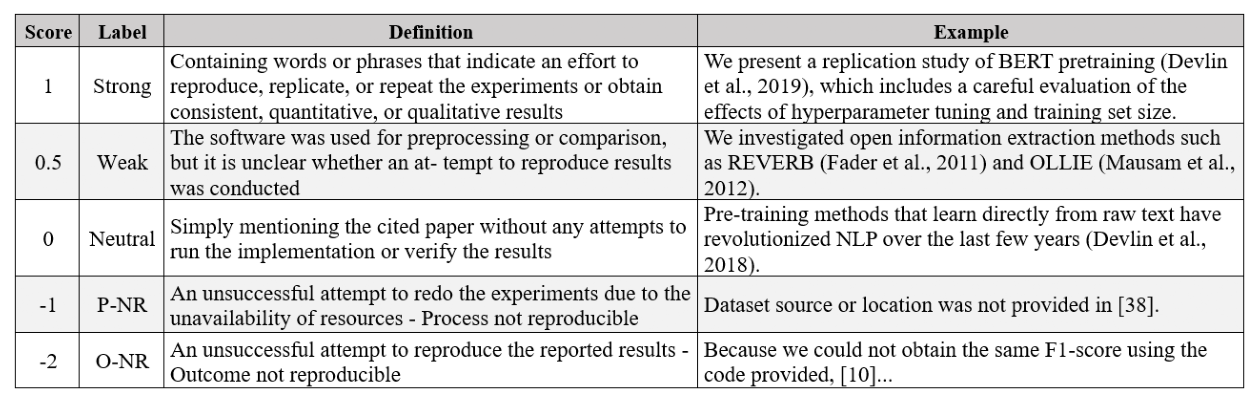

In [47]:
# label_menu()